In [1]:
import syft as sy
duet = sy.join_duet(loopback=True)

🎤  🎸  ♪♪♪ Joining Duet ♫♫♫  🎻  🎹

♫♫♫ > DISCLAIMER: Duet is an experimental feature currently in beta.
♫♫♫ > Use at your own risk.


    > ❤️ Love Duet? Please consider supporting our community!
    > https://github.com/sponsors/OpenMined

♫♫♫ > Punching through firewall to OpenGrid Network Node at:
♫♫♫ > http://ec2-18-218-7-180.us-east-2.compute.amazonaws.com:5000
♫♫♫ >
♫♫♫ > ...waiting for response from OpenGrid Network... 
♫♫♫ > DONE!


/home/tk/Desktop/Studia/masters/env/lib/python3.10/site-packages/aiortc/rtcdtlstransport.py:211: CryptographyDeprecationWarning: This version of cryptography contains a temporary pyOpenSSL fallback path. Upgrade pyOpenSSL now.
  _openssl_assert(lib.SSL_CTX_use_certificate(ctx, self._cert._x509) == 1)  # type: ignore
/home/tk/Desktop/Studia/masters/env/lib/python3.10/site-packages/aiortc/rtcdtlstransport.py:186: CryptographyDeprecationWarning: This version of cryptography contains a temporary pyOpenSSL fallback path. Upgrade pyOpenSSL now.
  value=certificate_digest(self._cert._x509),  # type: ignore



♫♫♫ > CONNECTED!


In [28]:
import torch as th

In [6]:
age_data = th.tensor([25,32,49,65,88,22])
age_data.tag("ages")
age_data.describe("Ages data of 6 people")

tensor([25, 32, 49, 65, 88, 22])

In [11]:
age_data_pointer = age_data.send(duet,pointable=True)

In [12]:
duet.store

[<syft.proxy.torch.TensorPointer object at 0x7f63a9fb1c30>, <syft.proxy.torch.TensorPointer object at 0x7f63a9fb1750>]

In [14]:
duet.store.pandas

,ID,Tags,Description,object_type
0,<UID: e67d606671304223bcd907a6e7fa0132>,[ages],Ages data of 6 people,<class 'torch.Tensor'>
1,<UID: 04959909420f4f568837cba86f0a5039>,[ages],Ages data of 6 people,<class 'torch.Tensor'>
2,<UID: feb54e10f132405683e259213b8a6f63>,[test],Count to 6,<class 'torch.Tensor'>


In [15]:
data_ptr = duet.store[2]

In [20]:
try:
    print(data_ptr.float().mean().get())
except Exception as e:
    print(e)

[2022-09-04T21:16:08.392395+0200][CRITICAL][logger]][11488] You do not have permission to .get() Object with ID: <UID: 5e537b37744240999837e345c2283ef4>Please submit a request.


You do not have permission to .get() Object with ID: <UID: 5e537b37744240999837e345c2283ef4>Please submit a request.


In [21]:
data_ptr.request(reason="I want to access the test data to perform a simple analysis")

In [22]:
try:
    print(data_ptr.float().mean().get())
except Exception as e:
    print(e)

tensor(3.5000)


In [26]:
print(data_ptr.float().amin().get())

tensor(1.)


In [7]:
duet.store

In [9]:
duet.store.pandas

,ID,Tags,Description,object_type
0,<UID: eae87ea9a5ae4fd79834f4b57a71e060>,[access],11-16,<class 'torch.Tensor'>
1,<UID: 3a5dc1b9106d4daca6a6aca14d278c90>,[deny],11-16,<class 'torch.Tensor'>


In [10]:
data_ptr = duet.store[1]

In [11]:
try:
    print(data_ptr.float().mean().get())
except Exception as e:
    print(e)

[2022-09-05T19:20:44.832411+0200][CRITICAL][logger]][37482] You do not have permission to .get() Object with ID: <UID: 046391c60abe4b3c879ea26984a25e74>Please submit a request.


You do not have permission to .get() Object with ID: <UID: 046391c60abe4b3c879ea26984a25e74>Please submit a request.


In [12]:
data_ptr.request(reason="I want to access the test data to perform a simple analysis")

In [13]:
try:
    print(data_ptr.float().mean().get())
except Exception as e:
    print(e)

[2022-09-05T19:20:50.620348+0200][CRITICAL][logger]][37482] You do not have permission to .get() Object with ID: <UID: 7296b64404484a7e9b3ee77d7fba12f4>Please submit a request.


You do not have permission to .get() Object with ID: <UID: 7296b64404484a7e9b3ee77d7fba12f4>Please submit a request.


In [18]:
duet.store.pandas

,ID,Tags,Description,object_type
0,<UID: 3a5dc1b9106d4daca6a6aca14d278c90>,[deny],11-16,<class 'torch.Tensor'>
1,<UID: 0bf28dd231ac4fd5b6ac70fd14b70029>,[access],5-9,<class 'torch.Tensor'>


In [15]:
data_ptr = duet.store[0]

In [17]:
try:
    t3_data = data_ptr.get(request_block=True)
    print(t3_data)
except Exception as e:
    print(e)

tensor([11, 12, 13, 14, 15, 16])


### IRIS Example

In [36]:
from sklearn import datasets
import torch
from sklearn.model_selection import train_test_split
import tqdm
import numpy as np
import torch.nn.functional as F
from torch.autograd import Variable
import pandas as pd
import matplotlib.pyplot as plt

In [120]:
duet.store.pandas

,ID,Tags,Description,object_type
0,<UID: 6f8a7ebaa5664e37afb0e3ff1332852f>,[iris-data],"The cms of of septal len, width, prental len, ...",<class 'torch.Tensor'>
1,<UID: 43a59b04ac494632a19e9a91452a3045>,[iris-target],Iris labels,<class 'torch.Tensor'>


In [121]:
data_ptr = duet.store[0]
target_ptr = duet.store[1]

In [122]:
print(data_ptr)
print(target_ptr)

In [123]:
print(duet.store.pandas["Description"][0])
print(duet.store.pandas["Description"][1])

The cms of of septal len, width, prental len, width
Iris labels


In [124]:
in_dim = 4
out_dim = 3
n_samples = 150

In [125]:
class SyNet(sy.Module):
    def __init__(self, torch_ref):
        super(SyNet, self).__init__(torch_ref=torch_ref)
        self.layer1 = self.torch_ref.nn.Linear(in_dim, 20)
        self.layer2 = self.torch_ref.nn.Linear(20, 30)
        self.out = self.torch_ref.nn.Linear(30, out_dim)

    def forward(self, x):
        x = self.torch_ref.nn.functional.relu(self.layer1(x))
        x = self.torch_ref.nn.functional.relu(self.layer2(x))
        output = self.torch_ref.nn.functional.log_softmax(self.out(x), dim=1)
        return output

In [126]:
local_model = SyNet(torch)

In [127]:
remote_model = local_model.send(duet)

In [128]:
remote_torch = duet.torch

In [129]:
params = remote_model.parameters()
optim = remote_torch.optim.Adam(params=params, lr=0.01)
print("params:", params)
print("optim:", optim)

params: <syft.proxy.syft.lib.python.ListPointer object at 0x7f0ac7e98970>
optim: <syft.proxy.torch.optim.AdamPointer object at 0x7f0aeb743940>


In [130]:
def train(iterations, model, torch_ref, optim, data_ptr, target_ptr):

    losses = []

    for i in range(iterations):

        optim.zero_grad()

        output = model(data_ptr)

        # nll_loss = negative log-liklihood loss
        loss = torch_ref.nn.functional.nll_loss(output, target_ptr.long())

        loss_item = loss.item()

        loss_value = loss_item.get(
            reason="To evaluate training progress", request_block=True, timeout_secs=5
        )

        if i % 10 == 0:
            print("Epoch", i, "loss", loss_value)

        losses.append(loss_value)

        loss.backward()

        optim.step()

    return losses



In [131]:
iteration = 50
losses = train(iteration, remote_model, remote_torch, optim, x_ptr, y_ptr)

Epoch 0 loss 1.0770183801651
Epoch 10 loss 0.4749302566051483
Epoch 20 loss 0.26288723945617676
Epoch 30 loss 0.11634128540754318
Epoch 40 loss 0.07402721792459488


In [132]:
losses

[1.0770183801651,
 0.977566659450531,
 0.9098525047302246,
 0.8524215817451477,
 0.7885106801986694,
 0.7244436144828796,
 0.6665759086608887,
 0.6121807098388672,
 0.5608727931976318,
 0.5140899419784546,
 0.4749302566051483,
 0.4440608322620392,
 0.41803160309791565,
 0.3948517143726349,
 0.37504827976226807,
 0.3565855622291565,
 0.3382933437824249,
 0.31953006982803345,
 0.3008383512496948,
 0.2819530963897705,
 0.26288723945617676,
 0.24409210681915283,
 0.22544418275356293,
 0.2076277732849121,
 0.19066931307315826,
 0.17495664954185486,
 0.16044040024280548,
 0.14742060005664825,
 0.1357089728116989,
 0.1254422813653946,
 0.11634128540754318,
 0.1086689755320549,
 0.10212542861700058,
 0.09644521027803421,
 0.09161742031574249,
 0.08753722906112671,
 0.08400165289640427,
 0.08095978945493698,
 0.07836110889911652,
 0.07607238739728928,
 0.07402721792459488,
 0.07222282141447067,
 0.07061648368835449,
 0.06914732605218887,
 0.06779654324054718,
 0.06656809151172638,
 0.0654515177

Text(0.5, 0, 'iteration')

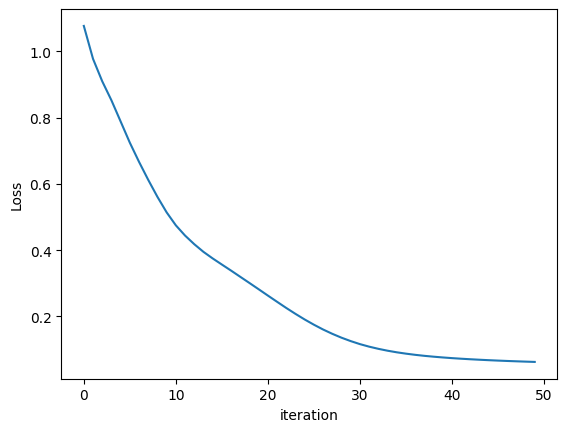

In [135]:
plt.plot(losses)
plt.ylabel("Loss")
plt.xlabel("iteration")

In [138]:
def get_local_model(model):
    if not model.is_local:
        try:
            local_model = model.get(
                request_block = True,
                reason="To run tests",
                timeout_secs=5
            )
        except Exception as e:
            print(e)
    else:
        local_model = model
    return local_model

In [139]:
local_model = get_local_model(remote_model)

In [140]:
from sklearn.metrics import accuracy_score

In [141]:
iris = datasets.load_iris()
x, y = iris.data, iris.target

In [144]:
x_test = torch.FloatTensor(np.array(x))
y_test = torch.LongTensor(np.array(y))

In [147]:
preds = []
with torch.no_grad():
    for i in range(len(x_test)):
        sample = x_test[i]
        y_hat = local_model(sample.unsqueeze(0))
        pred = y_hat.argmax().item()
        print(pred,"-",y_test[i])
        preds.append(pred)

0 - tensor(0)
0 - tensor(0)
0 - tensor(0)
0 - tensor(0)
0 - tensor(0)
0 - tensor(0)
0 - tensor(0)
0 - tensor(0)
0 - tensor(0)
0 - tensor(0)
0 - tensor(0)
0 - tensor(0)
0 - tensor(0)
0 - tensor(0)
0 - tensor(0)
0 - tensor(0)
0 - tensor(0)
0 - tensor(0)
0 - tensor(0)
0 - tensor(0)
0 - tensor(0)
0 - tensor(0)
0 - tensor(0)
0 - tensor(0)
0 - tensor(0)
0 - tensor(0)
0 - tensor(0)
0 - tensor(0)
0 - tensor(0)
0 - tensor(0)
0 - tensor(0)
0 - tensor(0)
0 - tensor(0)
0 - tensor(0)
0 - tensor(0)
0 - tensor(0)
0 - tensor(0)
0 - tensor(0)
0 - tensor(0)
0 - tensor(0)
0 - tensor(0)
0 - tensor(0)
0 - tensor(0)
0 - tensor(0)
0 - tensor(0)
0 - tensor(0)
0 - tensor(0)
0 - tensor(0)
0 - tensor(0)
0 - tensor(0)
1 - tensor(1)
1 - tensor(1)
1 - tensor(1)
1 - tensor(1)
1 - tensor(1)
1 - tensor(1)
1 - tensor(1)
1 - tensor(1)
1 - tensor(1)
1 - tensor(1)
1 - tensor(1)
1 - tensor(1)
1 - tensor(1)
1 - tensor(1)
1 - tensor(1)
1 - tensor(1)
1 - tensor(1)
1 - tensor(1)
1 - tensor(1)
1 - tensor(1)
1 - tensor(1)
1 - te

In [148]:
preds

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [149]:
acc = accuracy_score(y,preds)

In [150]:
print(acc)

0.9866666666666667
